In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

### Collect data 

In [ ]:
files_data = dict()
bad_lines = list()
with open("./data.json") as file:
    for i, line in enumerate(file.readlines()):
        try:
            line = line.encode().decode('unicode_escape')
            line = line.strip().replace("\'", "\"")
            obj = json.loads(line)
            files_data[obj["name"]] = obj["size"]
        except Exception as ex:
            bad_lines.append(line)
            files_data[obj["name"]] = 0

### Histogram of sizes

In [105]:
def plot_histogram_sizes(sizes: list):
    bins = [0] + [2**i for i in range(32)]
    cnt, _ = np.histogram(list(sizes), bins=bins)
    plt.bar(list(range(32)), cnt, log=True)

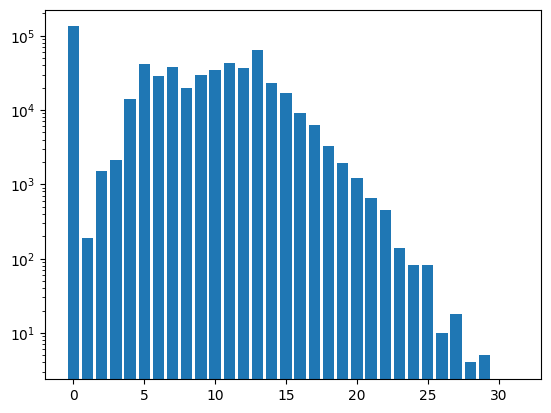

In [107]:
plot_histogram_sizes(list(files_data.values()))

### Some

In [ ]:
def folder_size(folder: str):
    res = 0
    for file, size in files_data.items():
        if folder in file:
           res += size
    return res

In [99]:
root_folders = set()
for file in files_data:
    try:
        root_folders.add(file.split("/")[1])
    except:
        print(file)
root_folders.remove("")

-


In [102]:
for folder in root_folders:
    folder = "/" + folder
    print(f"folder: {folder}, size: {folder_size(folder)}")

folder: /var, size: 3592010821
folder: /opt, size: 4399926
folder: /media, size: 158093500
folder: /dev, size: 102556106
folder: /sbin, size: 69355574
folder: /etc, size: 12909992
folder: /boot, size: 201445262
folder: /swapfile, size: 4087351741
folder: /home, size: 216679935
folder: /bin, size: 467273418
folder: /lib64, size: 4406
folder: /srv, size: 488416
folder: /sys, size: 239190271
folder: /mnt, size: 32474
folder: /usr, size: 10614845187
folder: /run, size: 15219985
folder: /lost+found, size: 16384
folder: /proc, size: 140737478767280
folder: /snap, size: 7385741570
folder: /root, size: 154005
folder: /lib, size: 11036179419
folder: /libx32, size: 4132
folder: /lib32, size: 39885
folder: /tmp, size: 607249
folder: /cdrom, size: 486085


### Select goood

In [109]:
good_folders = ["/cdrom", "/lib32", "/libx32", "/lib", "/root", "/lost+found", "/mnt", "/srv", "/lib64", "/bin", "/home", "/boot", "/etc", "/sbin", "/media", "opt", "/var"]
sum([folder_size(f) for f in good_folders])

15764635692

In [113]:
good_files_data = dict()
for file in files_data:
    for folder in good_folders:
        if file.startswith(folder):
            good_files_data[file] = files_data[file]
            break

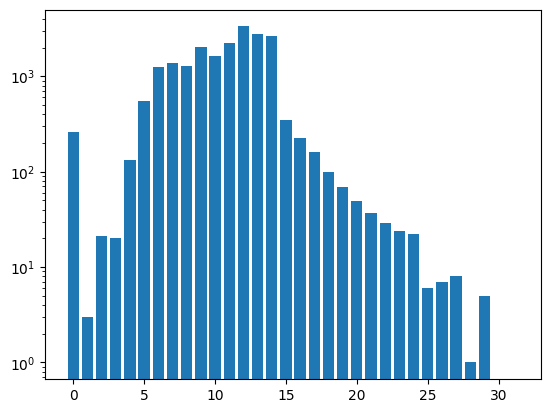

In [115]:
plot_histogram_sizes(good_files_data.values())

In [119]:
sorted_files = sorted(good_files_data.keys(), key=good_files_data.get, reverse=True)

In [121]:
for file in sorted_files[:50]:
    size = good_files_data[file]
    print(f"file: {file}, size: {size}")

file: /var/lib/snapd/seed/snaps/gnome-42-2204_141.snap, size: 521121792
file: /var/lib/snapd/snaps/gnome-42-2204_141.snap, size: 521121792
file: /var/lib/snapd/snaps/code_155.snap, size: 323534848
file: /var/lib/snapd/seed/snaps/firefox_3836.snap, size: 279584768
file: /var/lib/snapd/snaps/firefox_3836.snap, size: 279584768
file: /var/cache/apt/archives/linux-firmware_20220329.git681281e4-0ubuntu3.29_all.deb, size: 266744788
file: /var/lib/snapd/seed/snaps/gtk-common-themes_1535.snap, size: 96141312
file: /var/lib/snapd/snaps/gtk-common-themes_1535.snap, size: 96141312
file: /var/lib/snapd/seed/snaps/core22_1122.snap, size: 77819904
file: /var/lib/snapd/snaps/core22_1122.snap, size: 77819904
file: /var/cache/apt/archives/linux-modules-extra-6.5.0-25-generic_6.5.0-25.25~22.04.1_amd64.deb, size: 76803636
file: /boot/initrd.img-6.5.0-25-generic, size: 70218882
file: /boot/initrd.img-6.5.0-26-generic, size: 70199485
file: /var/cache/apt/archives/thunderbird_1%3a115.8.1+build1-0ubuntu0.22.0